In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

 The data set refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories.
This datast is available on UCI Machne Learning Repository. https://archive.ics.uci.edu/ml/datasets/wholesale+customers

In [2]:
data = '/content/Wholesale customers data.csv'

df = pd.read_csv(data)
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


We can see that Channel variable contains values as 1 and 2.

These two values classify the customers from two different channels as

1 for Horeca (Hotel/Retail/Café) customers and

2 for Retail channel (nominal) customers.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [4]:
df.shape

(440, 8)

There are 440 instances and 8 attributes in the dataset.

In [5]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Min and Max annual spending in monetary units(m.u.) on milk products is 55 and 73498 respectively.

Average annual spending in monetary units(m.u.) on frozen products is 3071.93.

Average annual spending in monetary units(m.u.) on grocery products is 7951.27.

In [6]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

No null values in the dataset.

Checking the correlation between variables using Heatmap.

Correlation Heatmap of the data


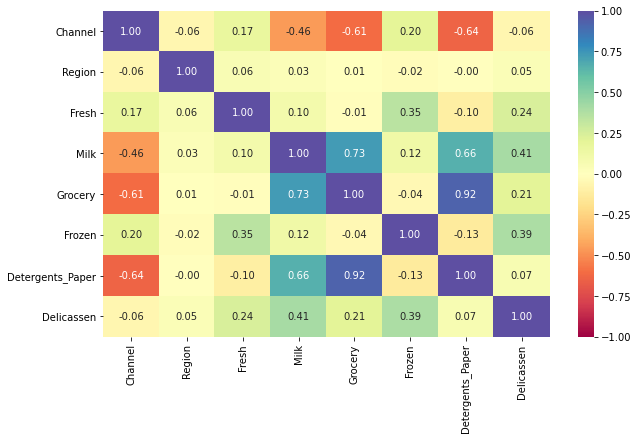

In [48]:
print('Correlation Heatmap of the data')
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,fmt='.2f',vmin=-1,vmax=1,cmap='Spectral')
plt.show()

Milk , Detergents_Paper and Grocery is somewhat correlated with Channel.

Detergents_Paper is correlated with Grocery and Milk.

Scaling the data using log transformation.

In [8]:
log_df = np.log(df[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']].copy())
log_df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525


In [9]:
def scatterplot(i,j):
    sns.regplot(data = log_df,x=i,y=j)
    plt.show()

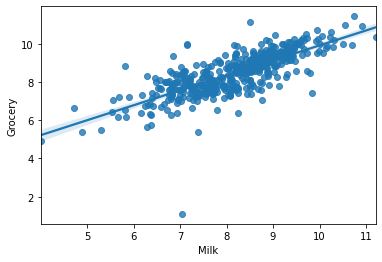

In [10]:
scatterplot(i='Milk',j='Grocery')

Milk and Grocery have a strong correlation.

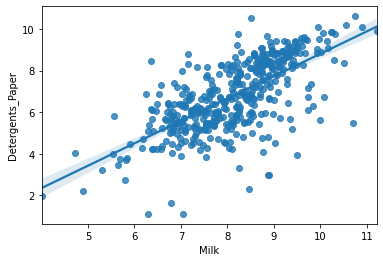

In [11]:
scatterplot(i='Milk',j='Detergents_Paper')

Milk and Detergent is highly scattered  around the centre which is quite obvious.

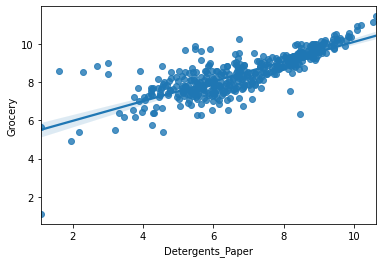

In [12]:
scatterplot(i='Detergents_Paper',j='Grocery')

Detergents Paper and Grocery have a strong correlation.

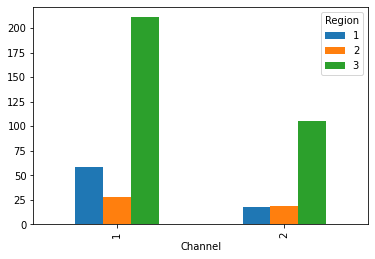

Region    1   2    3
Channel             
1        59  28  211
2        18  19  105


In [13]:
def categorical_multi(i,j):
    pd.crosstab(df[i],df[j]).plot(kind='bar')
    plt.show()
    print(pd.crosstab(df[i],df[j]))

categorical_multi(i='Channel',j='Region')

In [14]:
for k in list(log_df.columns):
    IQR = np.percentile(log_df[k],75) - np.percentile(log_df[k],25)
    
    Outlier_top = np.percentile(log_df[k],75) + 1.5*IQR
    Outlier_bottom = np.percentile(log_df[k],25) - 1.5*IQR
    log_df[k] = np.where(log_df[k] > Outlier_top,Outlier_top,log_df[k])
    log_df[k] = np.where(log_df[k] < Outlier_bottom,Outlier_bottom,log_df[k])

In [15]:
def continous_data(i):
    if log_df[i].dtype!='object':
        print('--'*60)
        sns.boxplot(log_df[i])
        plt.title("Boxplot of "+str(i))
        plt.show()
        plt.title("histogram of "+str(i))
        log_df[i].plot.kde()
        plt.show()
        plt.clf()

------------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


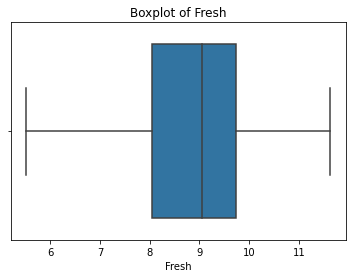

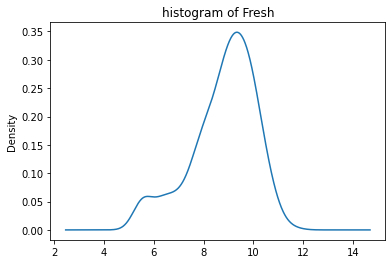

<Figure size 432x288 with 0 Axes>

In [16]:
continous_data('Fresh')

------------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


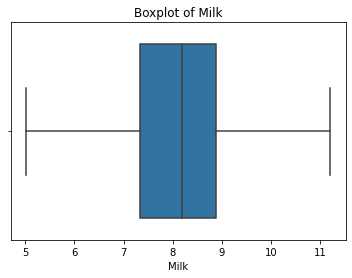

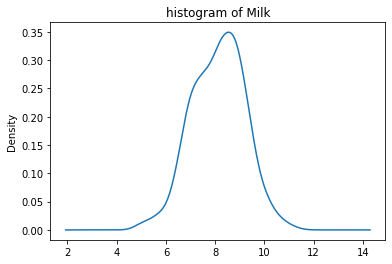

<Figure size 432x288 with 0 Axes>

In [17]:
continous_data('Milk')

------------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


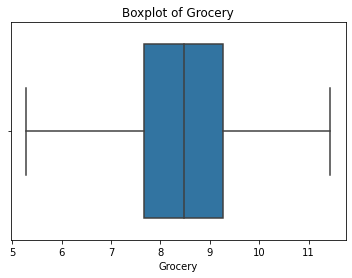

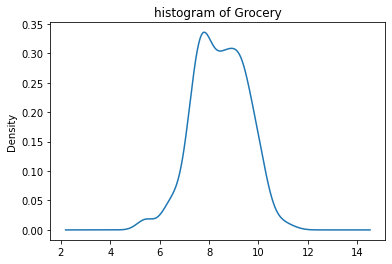

<Figure size 432x288 with 0 Axes>

In [18]:
continous_data('Grocery')

------------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


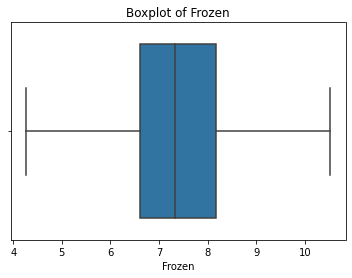

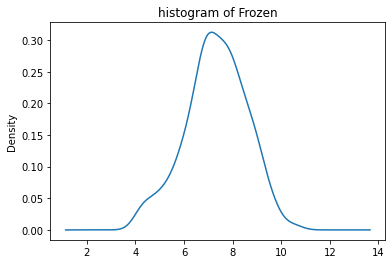

<Figure size 432x288 with 0 Axes>

In [19]:
continous_data('Frozen')

------------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


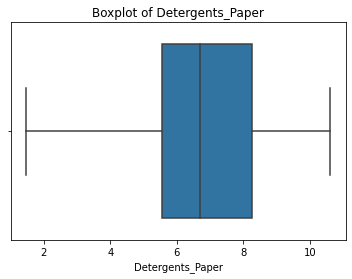

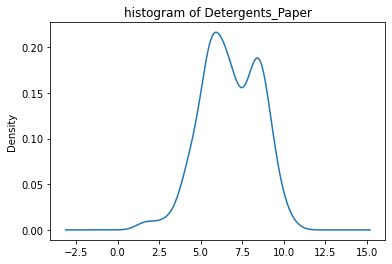

<Figure size 432x288 with 0 Axes>

In [20]:
continous_data('Detergents_Paper')

------------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


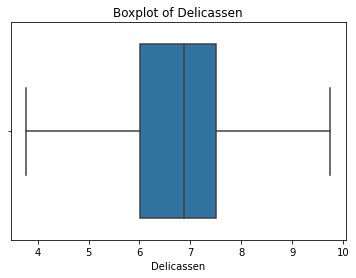

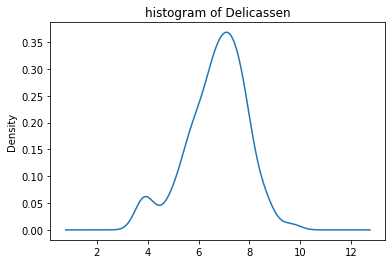

<Figure size 432x288 with 0 Axes>

In [21]:
continous_data('Delicassen')

All the outliers from the dataset is now removed.

Obtaining the pairplot of the log transformed dataset.

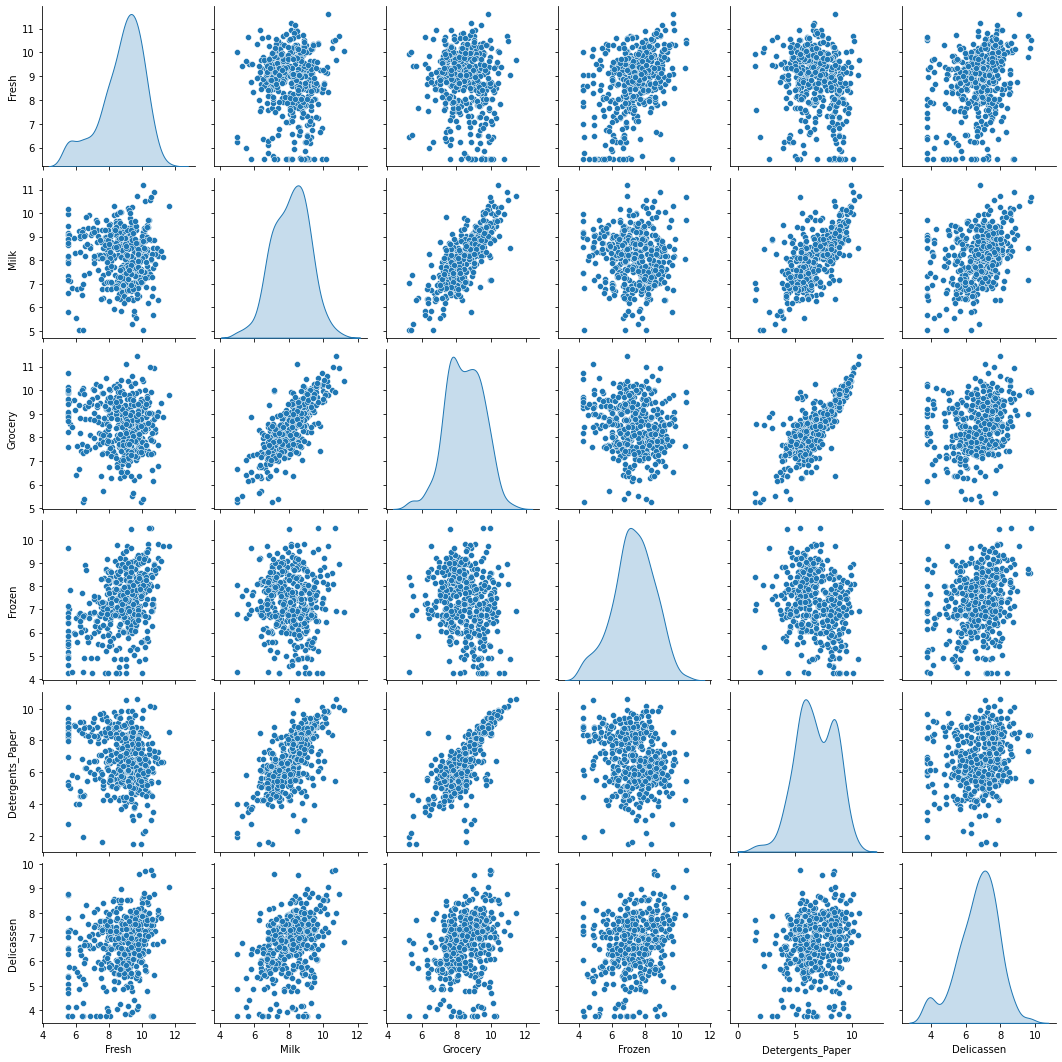

In [22]:
sns.pairplot(log_df,diag_kind = 'kde')

# Applying Principal Component Analysis over the data.

In [23]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

PCA_train = PCA(n_components=2).fit_transform(scaled_data)

print(scaled_data)

[[ 1.44865163  0.59066829  0.05293319 ... -0.58936716 -0.04356873
  -0.06633906]
 [ 1.44865163  0.59066829 -0.39130197 ... -0.27013618  0.08640684
   0.08915105]
 [ 1.44865163  0.59066829 -0.44702926 ... -0.13753572  0.13323164
   2.24329255]
 ...
 [ 1.44865163  0.59066829  0.20032554 ... -0.54337975  2.51121768
   0.12145607]
 [-0.69029709  0.59066829 -0.13538389 ... -0.41944059 -0.56977032
   0.21304614]
 [-0.69029709  0.59066829 -0.72930698 ... -0.62009417 -0.50488752
  -0.52286938]]


In [24]:
ps = pd.DataFrame(PCA_train)
ps.head()

,0,1
0,0.843939,-0.515351
1,1.062676,-0.484601
2,1.269141,0.682055
3,-1.056782,0.610821
4,0.634030,0.974199


## Applying the Elbow Method , Silhouette Clustering and KMeans to obtain the optimal cluster.

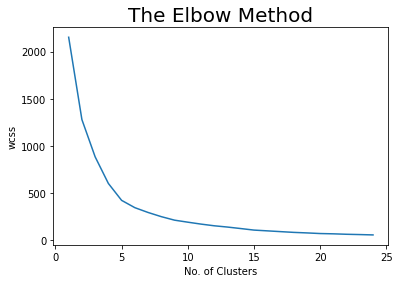

<Figure size 720x360 with 0 Axes>

In [25]:
wcss = []
for i in range(1, 25):
    km = KMeans(n_clusters = i, init = 'k-means++', 
                max_iter = 300, n_init = 10, random_state = 0)
    km.fit(ps)
    wcss.append(km.inertia_)
plt.plot(range(1, 25), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.figure(figsize = (10,5))
plt.show()

k = 5 is the optimum number of clusters.

In [26]:
no_of_clusters = [4, 5, 6,7] 
print("Average Silhouette Method\n")
for n_clusters in no_of_clusters: 
    cluster = KMeans(n_clusters = n_clusters) 
    cluster_labels = cluster.fit_predict(ps) 
    silhouette_avg = silhouette_score(ps, cluster_labels)
    print("For no of clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg) 

Average Silhouette Method

For no of clusters = 4 The average silhouette_score is : 0.5612471004920246
For no of clusters = 5 The average silhouette_score is : 0.5329206915930638
For no of clusters = 6 The average silhouette_score is : 0.5201476955737357
For no of clusters = 7 The average silhouette_score is : 0.4614560973787574


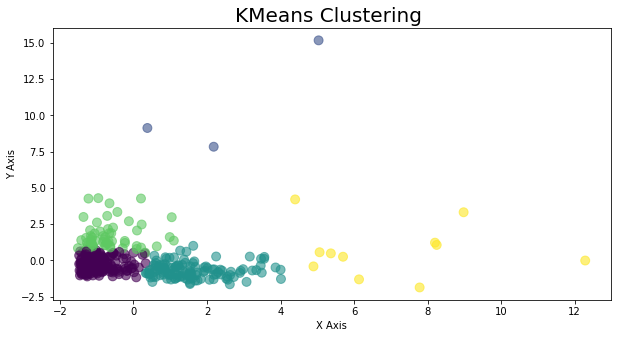

In [27]:
kmean = KMeans(n_clusters=5, random_state = 0).fit(ps)
y_kmeans = kmean.predict(ps)

plt.figure(figsize=(10,5))
plt.title("KMeans Clustering ",fontsize=20)
plt.scatter(ps[0], ps[1],c = y_kmeans, s=80,alpha=0.6)
plt.xlabel("X Axis")
plt.ylabel("Y Axis")
plt.show()

In [28]:
clusters = 5
kmeans = KMeans(n_clusters=clusters)
kmeans = kmeans.fit(df)
labels = kmeans.predict(df)
C_center = kmeans.cluster_centers_
print(labels,"\n",C_center)

[1 1 1 0 0 1 1 1 1 2 1 1 0 0 0 1 1 1 0 1 0 1 0 2 0 0 1 0 2 3 0 1 0 0 1 1 0
 0 2 3 0 0 2 2 1 2 2 4 1 2 1 1 3 2 0 1 2 2 0 1 1 4 1 2 1 2 1 0 1 1 0 0 1 0
 1 0 1 2 1 1 1 2 1 0 1 4 4 3 1 0 1 0 2 0 2 1 1 1 1 1 2 2 1 3 0 0 1 2 1 2 1
 2 0 0 0 1 1 1 0 1 0 1 1 1 3 3 0 0 1 3 1 1 0 1 1 1 1 1 0 1 0 0 3 1 0 2 1 1
 1 0 0 1 0 1 1 2 2 0 1 2 1 1 0 2 1 2 1 1 1 1 2 2 1 2 1 1 3 1 1 1 1 3 1 3 1
 1 1 1 1 2 0 0 1 2 1 0 0 1 1 1 2 2 0 1 1 2 1 1 1 2 0 2 1 1 1 2 2 0 2 1 0 1
 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 3 0 0 0 1 1 2 1 0 0 1 1 2 1 0 1 0 1 1 3
 3 1 1 0 1 2 2 2 0 2 0 1 1 1 3 1 1 0 1 1 0 1 1 3 0 3 3 1 0 0 3 1 1 1 2 0 1
 0 1 1 1 0 2 1 2 2 1 2 0 1 2 1 0 2 1 1 2 1 1 1 2 1 1 0 0 0 3 1 1 0 1 1 2 0
 4 0 0 0 1 1 1 1 1 1 2 1 1 2 0 1 2 1 2 1 2 0 1 0 2 1 1 0 1 1 1 1 1 1 1 0 1
 3 0 1 0 1 1 2 3 1 1 0 0 0 1 2 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0
 2 1 1 1 1 1 1 1 1 2 1 2 1 1 0 0 0 0 1 2 0 1 1 1 1 0 1 0 0 3 2 1 1] 
 [[1.19469027e+00 2.54867257e+00 2.06002832e+04 3.78783186e+03
  5.08984071e+03 3.98907080e+03 1.13014159e

In [29]:
dfGroup = pd.concat([df,pd.DataFrame(labels, columns= ['Group'])], axis=1, join='inner')
dfGroup.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Group
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,7844,1
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,0
5,2,3,9413,8259,5126,666,1795,1451,1
6,2,3,12126,3199,6975,480,3140,545,1
7,2,3,7579,4956,9426,1669,3321,2566,1
8,1,3,5963,3648,6192,425,1716,750,1
9,2,3,6006,11093,18881,1159,7425,2098,2


<Figure size 1440x1080 with 0 Axes>

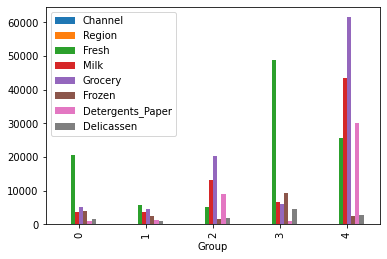

In [30]:
plt.figure(figsize = (20,15))
dfGroup.groupby("Group").aggregate("mean").plot.bar()

Fresh belong to Group 3 with the second highest value.

Grocery belong to Group 4 with the highest mean among all the variables. Milk and Detergents Paper also belong to Group 4.

# Assigning the variables in form of X and y for independent and dependent variables before applying the XGBoost Model.

In [31]:
X = df.drop('Channel', axis=1)
y = df['Channel']

In [32]:
y.head()

0    2
1    2
2    2
3    1
4    2
Name: Channel, dtype: int64

Converting y into 0 and 1 for further analysis.

In [33]:
y[y == 2] = 0
y[y == 1] = 1

In [34]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: Channel, dtype: int64

Converting the dataset into an optimized data structure called Dmatrix that XGBoost supports and gives it acclaimed performance and efficiency gains.

In [35]:
import xgboost as xgb
dmatrix = xgb.DMatrix(data=X,label=y)

Splitting the dataset into training and test set.

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [37]:
from xgboost import XGBClassifier
params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':100
        }         
xgb_clf = XGBClassifier(**params)

Fitting the classifier to the training data.

In [38]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=1.0, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [39]:
print(xgb_clf)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=1.0, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [40]:
y_pred = xgb_clf.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [41]:
from sklearn.metrics import accuracy_score

print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

XGBoost model accuracy score: 0.9167


Applying hyperparameter tuning to improve the model performance.

In [42]:
from xgboost import cv

params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

xgb_cv = cv(dtrain=dmatrix, params=params, nfold=3, num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=42)

In [43]:
xgb_cv.head()

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.908984,0.009693,0.895009,0.013188
1,0.914484,0.005941,0.891636,0.011413
2,0.916457,0.015967,0.893017,0.014949
3,0.937003,0.012867,0.917395,0.025228
4,0.936511,0.016412,0.911203,0.033625


In [ ]:
print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

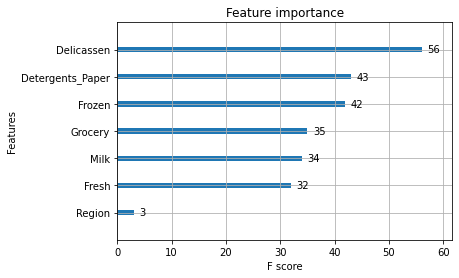

<Figure size 1080x1080 with 0 Axes>

In [44]:
xgb.plot_importance(xgb_clf)
plt.figure(figsize = (15, 15))
plt.show()

Delicassesn feature has given the highest importance score among all the other variables.

# Results

Applied Principal component analysis

Applied Elbow Method , Silhouette Clustering and KMeans to obtain the optimal cluster and group.

Applied XGBoost classifier and found the accuracy score to be 91.67%.

Performed k-fold cross-validation with XGBoost.

Obtained the feature importance of each variables in the dataset using feature importance plot of XGB.